<a href="https://colab.research.google.com/github/Henrique-Peter/covid19_vaccination/blob/main/Panorama_da_COVID_19_no_Brasil_e_impacto_da_vacina%C3%A7%C3%A3o_nos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama da COVID-19 no Brasil e impacto da vacinação nos dados

A COVID-19 veio para mudar as nossas vidas para sempre, com seu início aqui no Brasil em meados de março de 2020. Durante esses quase dois anos de pandemia, tivemos muitas dúvidas e discussões sobre o tema, abordando tópicos como gravidade da doença, medicação, tipos de variantes, responsabilidade coletiva, e mais recentemente, a eficácia das vacinas recém criadas para essa doença.

Infelizmente o Coronavírus se mostrou muito mais perigoso do que a maioria das pessoas pensou que seria no início, e a divulgação de fake news durante a pandemia causou diversos problemas, incluindo a falta de cuidados por parte de alguns, e até mesmo a prescrição de medicamentos que além de não terem resultados contra o vírus, podiam causar outros problemas de saúde em determinadas pessoas.

Em apenas dois anos, foram registradas mais de 5.8 milhões de mortes no mundo inteiro, sendo aproximadamente 640 mil aqui no Brasil. Mas em qual momento tivemos a maior concentração de mortes confirmadas durante a pandemia? Será que os gráficos nos mostram o que já esperávamos? Iremos tratar desses assuntos no decorrer do notebook.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Com o passar do tempo conseguimos aprender muitas coisas sobre o vírus, o que permitiu cientistas e profissionais da saúde do mundo inteiro juntarem suas forças e conhecimento para divulgar a criação de vacinas que são capazes de diminuir muito a probabilidade de contaminação dos humanos. A Rússia divulgou a sua vacina, denominada de Sputnik V em agosto de 2020, enquanto no Ocidente, no dia 8 de dezembro de 2020, o Reino Unido se tornou o primeiro país a vacinar a população contra o novo Coronavírus. O imunizante aprovado para o uso emergencial foi o desenvolvido pela parceria entre a farmacêutica americana Pfizer e a empresa de biotecnologia alemã BioNTech.

Já no Brasil, a vacinação contra a COVID-19 teve seu início apenas no dia 17 de janeiro de 2021, sendo que poderia ter iniciado muito antes. Por decisões governamentais, o Brasil teve um atraso que resultou em diversas mortes que poderiam ter sido evitadas, apenas com uma análise clara dos dados gerados pelos resultados nos países que já estavam vacinando suas populações.

<center><img alt="vacina" width="50%" src="https://raw.githubusercontent.com/Henrique-Peter/covid19_vaccination/main/5150374.jpg"></center>

No exato momento em que escrevo este artigo (02/03/2022), os dados sobre a vacinação no Brasil são os seguintes: foram aplicadas 378 milhões de doses, sendo que 82% da população total recebeu pelo menos uma dose, 71.7% estão totalmente vacinados (pelo menos duas doses, ou uma dose em caso de imunizante de dose única), e 26.6% já recebeu a dose de reforço.

Infelizmente muitas pessoas seguem não vacinadas por escolha própria, apresentando motivos de desconfiança na vacina e na Ciência, porém, sem confirmar suas teorias através de dados reais. Por isso, com o objetivo de elevar a consciência situacional a respeito da COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença, dando foco nos resultados gerados após o início da campanha de vacinação.

Todos os dados citados nessa introdução, são fornecidos pelo [Center for Systems Science and Engineering (CSSE) at Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19).

In [ ]:
# importando as bibliotecas básicas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importando o dataset da COVID-19

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Análise Exploratória dos Dados

Primeiramente, é importante frisar que o nosso foco nesta análise será nos dados brasileiros. Se você desejar, pode verificar mais informações sobre o panorama mundial da doença, no seguinte [link](https://news.google.com/covid19/map?hl=pt-BR&gl=BR&ceid=BR%3Apt-419).

Vamos visualizar as 5 primeiras entradas do nosso DataFrame, para entender melhor com quais dados estamos trabalhando.

In [ ]:
# visualizando as 5 primeiras entradas do DataFrame

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Ao verificar o tamanho do nosso DataFrame, percebemos que existem 67 colunas, e que como já confirmado nas 5 primeiras entradas, temos muitos dados ausentes...

In [ ]:
# verificando o tamanho do nosso DataFrame (linhas, colunas)

df.shape

(165408, 67)

Teremos que fazer uma limpeza nos dados, para não obtermos resultados distorcidos pelos valores ausentes. Além disso, podemos eliminar algumas colunas que não serão essenciais para o estudo nesse caso, visto que queremos encontrar as relações entre a vacinação, casos confirmados e número de mortes causadas pela doença.

Dessa maneira teremos dados mais objetivos e de maior qualidade para a análise em questão.

## Vamos visualizar os nomes de todas as colunas, assim como o tipo de cada uma

Podemos ver que a nossa variável ***date*** está representada como objeto, então teremos que tranformá-la em ***datetime***. Vamos realizar essa alteração após a limpeza dos nossos dados, quando transformaremos também a variável dos dias no nosso index (como essa coluna apresenta valores únicos, sendo que cada um representa um dia, ela pode ser o índice do DataFrame).

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

## Agora vamos descobrir qual a porcentagem de valores ausentes para cada coluna

Algumas variáveis apresentam quase 100% de valores ausentes.

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

weekly_icu_admissions_per_million          0.967390
weekly_icu_admissions                      0.967390
excess_mortality_cumulative_per_million    0.965564
excess_mortality                           0.965564
excess_mortality_cumulative                0.965564
                                             ...   
total_cases                                0.018318
population                                 0.006475
date                                       0.000000
location                                   0.000000
iso_code                                   0.000000
Length: 67, dtype: float64

## Limpeza de dados não essenciais

Como já foi dito anteriormente, a análise será voltada para os dados de vacinação, e a sua relação com os números de casos confirmados e mortes em todo o período. Então não iremos usar todas as variáveis presentes no dataset, e podemos eliminar as que não serão essenciais para poder trabalhar com um conjunto de dados mais objetivo.

Em seguida irei apresentar um dicionário de variáveis, no qual terá as descrições de cada variável que irei usar de fato. Se tiver curiosidade de saber a descrição de cada uma presente no dataset inicial, pode acessar este [link](https://github.com/owid/covid-19-data/blob/master/public/data/README.md). Nesse caso, a grande maioria das colunas eliminadas, tratavam de dados reduzidos, para análises semanais isoladas, ou formatados de outra maneira, como valores por centena e milhão de habitantes.

In [ ]:
# excluindo as colunas que não serão utilizadas

df.drop(['iso_code', 'new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'icu_patients_per_million',
       'hosp_patients_per_million', 'weekly_icu_admissions_per_million',
       'weekly_hosp_admissions_per_million', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
       'stringency_index', 'aged_70_older', 'cardiovasc_death_rate', 'female_smokers',
       'male_smokers', 'human_development_index', 'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million'],
        axis = 1, inplace = True)

In [ ]:
# verificando o novo tamanho do DataFrame

df.shape

(165408, 32)

## Criando o DataFrame para o Brasil

Como o conjunto de dados inicial é composto por diversos países, temos que filtrar somente as entradas de dados do Brasil. Para isso iremos localizar as entradas que possuem o valor "***Brazil***" na coluna de localidade.

Após isso, podemos visualizar o nosso novo DataFrame, assim como o seu tamanho: 

In [ ]:
# fazendo uma cópia do DataFrame somente com as entradas do Brasil

df_brasil = df.loc[df.location == 'Brazil'].copy()

In [ ]:
df_brasil.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,new_tests,total_tests,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
21193,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213993441.0,25.04,33.5,8.552,14103.452,3.4,8.11,NaN,2.2,75.88
21194,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213993441.0,25.04,33.5,8.552,14103.452,3.4,8.11,NaN,2.2,75.88
21195,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213993441.0,25.04,33.5,8.552,14103.452,3.4,8.11,NaN,2.2,75.88
21196,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213993441.0,25.04,33.5,8.552,14103.452,3.4,8.11,NaN,2.2,75.88
21197,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213993441.0,25.04,33.5,8.552,14103.452,3.4,8.11,NaN,2.2,75.88


Agora estamos trabalhando com menos linhas, o que torna o nosso objetivo mais fácil, além de abrir a possibilidade de ter as datas como index, já que elas não se repetem mais.

In [ ]:
df_brasil.shape

(735, 32)

Vamos repetir o processo anterior, de verificar a porcentagem de dados ausentes em cada coluna, só que no nosso novo DataFrame.

In [ ]:
(df_brasil.isnull().sum() / df_brasil.shape[0]).sort_values(ascending = False)

positive_rate                 1.000000
handwashing_facilities        1.000000
icu_patients                  1.000000
hosp_patients                 1.000000
weekly_icu_admissions         1.000000
weekly_hosp_admissions        1.000000
tests_per_case                1.000000
total_boosters                0.761905
new_tests                     0.639456
total_tests                   0.511565
people_fully_vaccinated       0.478912
people_vaccinated             0.457143
new_vaccinations              0.455782
total_vaccinations            0.451701
tests_units                   0.100680
reproduction_rate             0.027211
new_deaths                    0.027211
total_deaths                  0.027211
new_cases                     0.002721
aged_65_older                 0.000000
diabetes_prevalence           0.000000
hospital_beds_per_thousand    0.000000
extreme_poverty               0.000000
gdp_per_capita                0.000000
continent                     0.000000
median_age               

Conseguimos identificar 7 colunas que estão com 100% dos dados ausentes, o que torna elas desnecessárias para a análise final.

Ainda temos 3 colunas que contém mais de 50% dos seus dados como ausentes, mas ao analisar o que cada uma representa, vemos que se trata de testes de contaminação e de doses de reforço, dados que não eram registrados no início da pandemia. As doses de reforço começaram há pouco tempo a serem aplicadas, então esses dados ausentes são importantes para sabermos as datas de início. Já o número total de testes, teremos que analisar melhor com o decorrer da análise, visto que nas últimas entradas também temos alguns valores nulos. 

Por enquanto, vamos eliminar as colunas que não possuem nenhum dado registrado, e depois vamos mudar o tipo da variável ***date***, além de tornar ela o novo index do nosso DataFrame.

In [ ]:
# eliminando as colunas sem dados registrados

df_brasil.drop(['positive_rate', 'handwashing_facilities', 'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions', 'tests_per_case'], 
               axis = 1, inplace = True)

# Análise com o novo DataFrame

Agora que fizemos a maior limpeza dos dados, mantivemos apenas os valores referentes ao Brasil, e ainda passamos as datas para o índice, vamos plotar os gráficos e retirar o maior número de conclusões que conseguirmos através do dataset que temos.

In [ ]:
# DataFrame atualizado

df_brasil.date = pd.to_datetime(df_brasil.date)
df_brasil.set_index('date', inplace=True)
df_brasil

,continent,location,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,total_tests,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,South America,Brazil,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213993441.0,25.04,33.5,8.552,14103.452,3.4,8.11,2.2,75.88
2020-02-27,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213993441.0,25.04,33.5,8.552,14103.452,3.4,8.11,2.2,75.88
2020-02-28,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213993441.0,25.04,33.5,8.552,14103.452,3.4,8.11,2.2,75.88
2020-02-29,South America,Brazil,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213993441.0,25.04,33.5,8.552,14103.452,3.4,8.11,2.2,75.88
2020-03-01,South America,Brazil,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213993441.0,25.04,33.5,8.552,14103.452,3.4,8.11,2.2,75.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-25,South America,Brazil,28679671.0,90436.0,648496.0,793.0,0.74,NaN,NaN,NaN,391253145.0,177448925.0,154573852.0,64282472.0,1504771.0,213993441.0,25.04,33.5,8.552,14103.452,3.4,8.11,2.2,75.88
2022-02-26,South America,Brazil,28749552.0,69881.0,649184.0,688.0,0.75,NaN,NaN,NaN,391785022.0,177544796.0,154668487.0,64624776.0,531877.0,213993441.0,25.04,33.5,8.552,14103.452,3.4,8.11,2.2,75.88
2022-02-27,South America,Brazil,28776794.0,27242.0,649437.0,253.0,NaN,NaN,NaN,NaN,391970436.0,177579708.0,154719004.0,64725099.0,185414.0,213993441.0,25.04,33.5,8.552,14103.452,3.4,8.11,2.2,75.88


In [ ]:
df_brasil.describe()

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy
count,7.350000e+02,733.000000,715.000000,715.000000,715.00000,2.650000e+02,3.590000e+02,4.030000e+02,3.990000e+02,3.830000e+02,1.750000e+02,4.000000e+02,735.0,7.350000e+02,735.0,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02
mean,1.173549e+07,39172.944065,328019.218182,908.981818,1.10758,1.396434e+05,3.399025e+07,1.691132e+08,9.672728e+07,6.791255e+07,2.192401e+07,9.756824e+05,213993441.0,2.504000e+01,33.5,8.552000e+00,1.410345e+04,3.400000e+00,8.110000e+00,2.200000e+00,7.588000e+01
std,8.755732e+06,37153.486545,228514.987781,764.056677,0.33437,3.890025e+05,1.800452e+07,1.299245e+08,6.464678e+07,5.577311e+07,2.020000e+07,6.429625e+05,0.0,4.692776e-13,0.0,8.176806e-14,2.311690e-10,4.710551e-14,7.288023e-14,2.844106e-14,8.816730e-13
min,1.000000e+00,0.000000,1.000000,0.000000,0.66000,2.410000e+02,1.796980e+05,1.120000e+02,1.120000e+02,1.962000e+03,2.820000e+02,9.970000e+02,213993441.0,2.504000e+01,33.5,8.552000e+00,1.410345e+04,3.400000e+00,8.110000e+00,2.200000e+00,7.588000e+01
25%,3.790735e+06,13398.000000,130957.500000,349.500000,0.94000,2.910300e+04,2.215640e+07,4.483366e+07,2.993894e+07,1.853131e+07,4.207068e+06,4.086592e+05,213993441.0,2.504000e+01,33.5,8.552000e+00,1.410345e+04,3.400000e+00,8.110000e+00,2.200000e+00,7.588000e+01
50%,1.052473e+07,31677.000000,268759.000000,734.000000,1.01000,5.776100e+04,3.430876e+07,1.515062e+08,1.086585e+08,4.970591e+07,1.588996e+07,9.050790e+05,213993441.0,2.504000e+01,33.5,8.552000e+00,1.410345e+04,3.400000e+00,8.110000e+00,2.200000e+00,7.588000e+01
75%,2.075195e+07,54167.000000,583302.000000,1192.500000,1.14000,9.705200e+04,4.936868e+07,2.946339e+08,1.617170e+08,1.280083e+08,3.632998e+07,1.411312e+06,213993441.0,2.504000e+01,33.5,8.552000e+00,1.410345e+04,3.400000e+00,8.110000e+00,2.200000e+00,7.588000e+01
max,2.881885e+07,287149.000000,649922.000000,4148.000000,3.06000,2.920329e+06,6.964100e+07,3.929256e+08,1.778369e+08,1.550717e+08,6.507321e+07,3.976605e+06,213993441.0,2.504000e+01,33.5,8.552000e+00,1.410345e+04,3.400000e+00,8.110000e+00,2.200000e+00,7.588000e+01


### Dicionário de variáveis

* **continent** - continente no qual o país se localiza
* **location** - país
* **total_cases** - número total de casos
* **total_deaths** - número total de mortes
* **new_deaths** - novas mortes registradas na data
* **reproduction_rate** - estimador em tempo real da eficiência da taxa de reprodução
* **new_tests** - novos testes feitos na data
* **total_tests** - número total de testes
* **tests_units** - unidades de saúde que indicaram os resultados dos testes
* **total_vaccinations** - número total de doses aplicadas
* **people_vaccinated** - número de pessoas com pelo menos uma dose feita
* **people_fully_vaccinated** - número de pessoas totalmente vacinadas
* **total_boosters** - número de doses de reforço aplicadas
* **new_vaccinations** - novas doses aplicadas na data
* **population** - população total do país
* **population_density** - número de pessoas dividido pelos metros quadrados de área do país
* **median_age** - idade média da população
* **aged_65_older** - número de pessoas com mais de 65 anos
* **gdp_per_capita** - PIB per capita do país
* **extreme_poverty** - porcentagem da população vivendo em extrema pobreza
* **diabetes_prevalence** - porcentagem da população que tem diabetes (entre 20 e 79 anos) 
* **hospital_beds_per_thousand** - número de camas de hospital para cada 1000 habitantes
* **life_expectancy** - expectativa de vida no país

### Gráfico de mortes diárias

Vamos visualizar um gráfico que nos mostra o número de novas mortes por dia, durante todo o período da pandemia. Como este gráfico está ligado ao dataframe, toda vez que o notebook for rodado novamente, ele estará com os valores mais recentes.

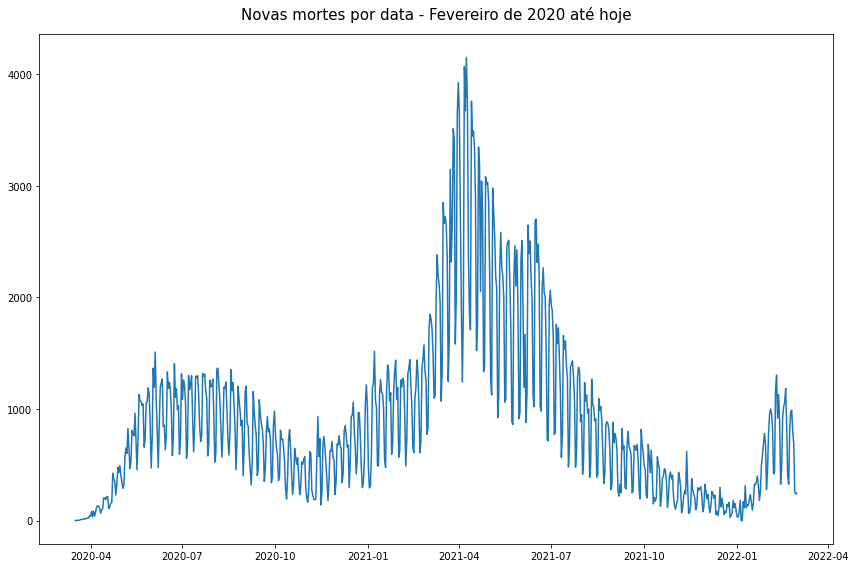

In [ ]:
# plot do gráfico de mortes diárias no período total

x = df_brasil.index
y = df_brasil.new_deaths

fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(x, y)
ax.set_title('Novas mortes por data - Fevereiro de 2020 até hoje', fontsize = 15 ,pad = 15)

plt.tight_layout()

### Problemas de interpretação de um gráfico

Ao analisar o gráfico acima sem entender a fundo os dados, poderíamos concluir de maneira errada que o número de mortes diárias cresceu muito após o início da campanha de vacinação aqui no Brasil (que como citado antes, teve seu início em janeiro de 2021), e por isso a vacina não seria eficaz contra o vírus, e até mesmo poderia causar a morte de pessoas.

Vamos analisar alguns tópicos de forma isolada, para ver se as conclusões fazem sentido:

* As mortes diárias confirmadas tiveram um aumento exponencial após a virada de ano, de 2020 para 2021, período em que estávamos no auge da pandemia, e que mesmo assim, muitas pessoas ignoraram os protocolos básicos de prevenção da doença e se aglomeraram em multidões por todo o país, aumentando muito o número de casos;
* Em abril de 2021, auge do número de novas mortes por dia, havia apenas 3 meses que a campanha de vacinação tinha iniciado, sendo que poucas pessoas tinham recebido somente a primeira dose da vacina; 
* Com o decorrer do tempo, mais pessoas foram se vacinando, e o número de mortes por dia decaiu drasticamente, com um aumento somente na virada de ano de 2021 para 2022, assim como tinha ocorrido no réveillon passado.

### Analisando a relação dos casos confirmados e mortes

Utilizando a técnica dos gráficos normalizados, nos quais todos os dados analisados são transformados para a mesma escala, vamos verificar as relações entre os novos casos confirmados (linha laranja) e as novas mortes confirmadas (linha azul).

Para essa comparação, irei utilizar os primeiros 20 dias de fevereiro de 2021 no primeiro gráfico, e o exato mesmo período um ano depois, para o segundo gráfico. Perceba que no primeiro gráfico as linhas dos casos e das mortes seguem praticamente juntas, mostrando que naquele período, conforme iam aparecendo novos casos, novas mortes eram confirmadas na mesma proporção. Já no segundo gráfico, que representa um período no qual já tínhamos mais pessoas vacinadas, começamos a ter muito mais casos confirmados (resultado da quantidade de aglomerações que tivemos no início do ano) mas muito menos mortes confirmadas.

Podemos tentar imaginar a tragédia que seria se não tivéssemos as vacinas, visto que teríamos os resultados do primeiro gráfico, na mesma proporção geral do segundo gráfico. Para o cenário mundial, isso representaria milhões de mortes a mais. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


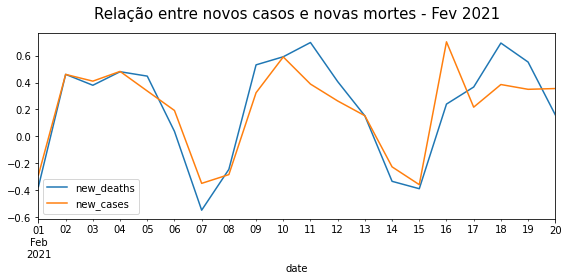

In [ ]:
# plot dos gráficos normalizados
df_norm = (df_brasil - df_brasil.mean()) / df_brasil.std()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

# mortes diárias
df_norm.loc['2021-02-01':'2021-02-20',"new_deaths"].plot(kind="line", ax=ax)

# novos casos confirmados
df_norm.loc['2021-02-01':'2021-02-20':,"new_cases"].plot(kind="line", ax=ax)

# eixo-x e title
ax.set_title("Relação entre novos casos e novas mortes - Fev 2021", fontsize=15, pad=15)
ax.legend()

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


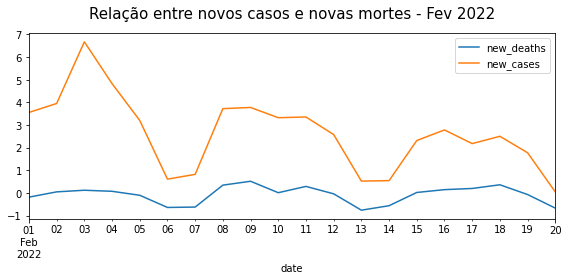

In [ ]:
# plotar os gráficos normalizados
df_norm = (df_brasil - df_brasil.mean()) / df_brasil.std()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

# plotar temperatura média
df_norm.loc['2022-02-01':'2022-02-20',"new_deaths"].plot(kind="line", ax=ax)

# plotar casos confirmados
df_norm.loc['2022-02-01':'2022-02-20':,"new_cases"].plot(kind="line", ax=ax)

# eixo-x e title
ax.set_title("Relação entre novos casos e novas mortes - Fev 2022", fontsize=15, pad=15)
ax.legend()

plt.tight_layout()

### O caos evitado pelas vacinas

Um estudo realizado pela The Commomwealth Fund, mostrou através de um gráfico quantas vidas poderiam ter sido perdidas sem as aplicações das vacinas, apenas nos EUA. Os resultados foram adquiridos por técnicas de previsão com regressão linear, e o artigo completo pode ser acessado por este [link](https://www.commonwealthfund.org/publications/issue-briefs/2021/dec/us-covid-19-vaccination-program-one-year-how-many-deaths-and).

O que é interessante perceber, é o impacto visual que esse gráfico causa, sendo completamente assustador pensar em um cenário em que esses dados se concretizassem. Como podemos ver a seguir, a linha verde representa a projeção do modelo com a vacinação, e a linha vermelha sem a vacinação. O artigo ainda afirma que o estudo chegou em um resultado de 1.1 milhão de mortes adicionais, e mais de 10 milhões de hospitalizações adicionais, no cenário sem as vacinas.

<img alt="Colaboratory logo" width="70%" src="https://images.jifo.co/2547186_1639427237812.png">

## Conclusão

Vacinas salvam vidas, e os dados podem comprovar. Essa seria a melhor frase para resumir o que analisamos aqui. Uma pandemia traz muita tristeza, desespero e dúvidas, mas com certeza também nos ensina muitas coisas. Nunca estamos preparados para algo completamente novo, e nesses momentos a Ciência tem um papel de extrema importância, visto que através de conhecimentos e estudos passados, podemos descobrir coisas novas e evoluir como sociedade, preparando defesas contra qualquer tipo de imprevisto que possamos ter no futuro.